# Identifying and Removing Outliers



## Test dataset

* Generate 10000 random numbers following Gaussian distribution(normal distribution).


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Generate 10000 random numbers
RAND_NUMBERS = 10000
rng = np.random.default_rng(seed=1)
random_numbers = rng.standard_normal(size=RAND_NUMBERS)
# create a dataset with std 5 and mean 50
target_sigma = 5
target_mu = 50

dataset = (random_numbers * target_sigma) + target_mu
print(f"mean: {dataset.mean()}, std: {dataset.std()}")

# np.random.seed(1)
# random_numbers = np.random.randn(RAND_NUMBERS)

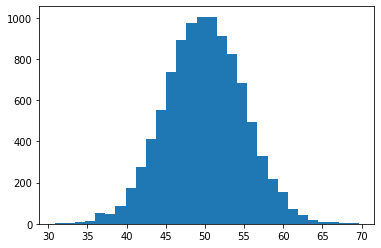

In [46]:
# Visualize the distribution of the dataset.
plt.hist(dataset, bins=30)
plt.show()

In [ ]:
# Another way to create normally distributed data.
# dataset = rng.normal(loc=target_mu, scale=target_sigma, size=RAND_NUMBERS)
# print(f"mean: {dataset.mean()}, std: {dataset.std()}")

## Outlier detection using standard deviation

This technique can be used for features that **follow Gaussian or Gaussian-like distribution**.

In this method we calculate the z-score of the datapoint and reject those datapoints with z-scores beyond the configured threshold. Commonly selected threshold is 3(3 standard deviations from the mean)

In [ ]:
# Method-1: Identifying outliers using z-scores
z_threshold = 3
mu = dataset.mean()
sigma = dataset.std()

z_scores = (dataset - mu) / sigma
outliers = dataset[abs(z_scores) > z_threshold]
non_outliers = dataset[abs(z_scores) <= z_threshold]
print(f"outliers:{outliers.size}, nonoutliers: {non_outliers.size}")

In [ ]:
# Method-2: Using lower and upper bound
mu = dataset.mean()
sigma = dataset.std()
# 3 standard deviations
cut_off = sigma * 3

lower, upper = (mu - cut_off, mu + cut_off)

outliers = dataset[(dataset < lower) | (dataset > upper)]
non_outliers = dataset[(dataset >= lower) & (dataset <= upper)]
print(f"outliers:{outliers.size}, nonoutliers: {non_outliers.size}")

Above technique is referred to as univariate data with Gaussian distribution, since the dataset contains only a single feature that follows the normal distribution.

> You can use the same approach if you have multivariate data, e.g. data with multiple variables, each with a different Gaussian distribution.

## Interquartile range method

* This technique can be used to identify outliers in features that don't follow normal distribution.

* From a dataset we can compute min, 25th percentile, 50th percentile(median), 75th percentile and max. These 5 statistics can be visualized using the **box and whisker plot**.

* Values betweent the 25th and 75th percentile is known as the IQR. `75th percentile - 25th percentile`

* Common technique used is `1.5IQR` rule to identify outliers. All values that are below `25th percentile - 1.5 * IQR` or above `75th percentile + 1.5 * IQR` are considered as outliers.

* But the factor of `k=1.5` can also vary. By setting k=3, we could identify datapoints that are extreme outliers(aka far outs)

In [ ]:
q25 = np.percentile(dataset, 25)
q75 = np.percentile(dataset, 75)
iqr = q75 - q25

print(f"25th:{q25}, 75th:{q75}, iqr: {iqr:.3f}")

lower, upper = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
outliers = dataset[(dataset < lower) | (dataset > upper)]
non_outliers = dataset[(dataset >= lower) & (dataset <= upper)]
print(f"outliers:{outliers.size}, nonoutliers: {non_outliers.size}")